In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv('E:\Data Science 2.0 Course Prectice\customer_churn.csv')
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [30]:
df.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company', 'Churn'],
      dtype='object')

In [31]:
df['Account_Manager'].value_counts()

Account_Manager
0    467
1    433
Name: count, dtype: int64

In [32]:
df['Company'].value_counts()

Company
Anderson Group                     4
Williams PLC                       3
Wilson PLC                         3
Smith Group                        2
Williams LLC                       2
                                  ..
Cowan Inc                          1
Cortez Inc                         1
Rodriguez, Moore and Cunningham    1
Bennett Ltd                        1
Robles-Abbott                      1
Name: count, Length: 873, dtype: int64

In [59]:
df = pd.read_csv('E:\Data Science 2.0 Course Prectice\Churn_Modelling.csv')

In [60]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
df.drop(['RowNumber'],axis=1,inplace=True)

In [62]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
df.drop(['Surname'],axis=1,inplace=True)

In [64]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [66]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [67]:
df['Gender'] = np.where(df['Gender']=='male',0,1)

In [68]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [69]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [70]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [71]:
ordinal_ecoder = OrdinalEncoder(categories=[['France','Germany','Spain']])

In [72]:
d1 = pd.DataFrame(ordinal_ecoder.fit_transform(df[['Geography']]).astype(int),columns=ordinal_ecoder.get_feature_names_out())

In [73]:
df.drop('Geography',axis=1,inplace=True)

In [74]:
df = pd.concat([df,d1],axis=1)

In [75]:
df.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography
0,15634602,619,1,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,608,1,41,1,83807.86,1,0,1,112542.58,0,2
2,15619304,502,1,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,699,1,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,1,43,2,125510.82,1,1,1,79084.10,0,2


In [76]:
df['Geography'].value_counts()

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

In [77]:
df.dtypes

CustomerId           int64
CreditScore          int64
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Geography            int32
dtype: object

In [79]:
df.duplicated().sum()

0

In [81]:
from sklearn.model_selection import train_test_split
y = df['Exited']
x = df.drop(['Exited'],axis=1)

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [85]:
x_train.shape

(8000, 11)

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [90]:
import tensorflow
from tensorflow import keras

In [91]:
from tensorflow.keras import Sequential

In [92]:
from tensorflow.keras.layers import Dense

In [93]:
model =Sequential()

In [138]:
model.add(Dense(3,activation='relu',input_dim=11))
model.add(Dense(10,activation='relu')
model.add(Dense(1,activation='sigmoid'))

SyntaxError: '(' was never closed (3396699035.py, line 2)

In [139]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 293 (1.15 KB)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 196 (788.00 B)

In [140]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [141]:
history = model.fit(x_train,y_train,epochs=10,verbose=2,validation_split=0.20,validation_freq=2)

Epoch 1/10


200/200 - 3s - 15ms/step - accuracy: 0.7934 - loss: 0.4651
Epoch 2/10
200/200 - 1s - 5ms/step - accuracy: 0.7934 - loss: 0.4575 - val_accuracy: 0.7987 - val_loss: 0.4468
Epoch 3/10
200/200 - 0s - 2ms/step - accuracy: 0.7934 - loss: 0.4516
Epoch 4/10
200/200 - 1s - 3ms/step - accuracy: 0.7934 - loss: 0.4475 - val_accuracy: 0.7987 - val_loss: 0.4386
Epoch 5/10
200/200 - 0s - 2ms/step - accuracy: 0.7934 - loss: 0.4449
Epoch 6/10
200/200 - 1s - 3ms/step - accuracy: 0.7934 - loss: 0.4433 - val_accuracy: 0.7987 - val_loss: 0.4353
Epoch 7/10
200/200 - 1s - 3ms/step - accuracy: 0.7934 - loss: 0.4423
Epoch 8/10
200/200 - 1s - 3ms/step - accuracy: 0.7934 - loss: 0.4415 - val_accuracy: 0.7987 - val_loss: 0.4341
Epoch 9/10
200/200 - 0s - 2ms/step - accuracy: 0.7934 - loss: 0.4411
Epoch 10/10
200/200 - 1s - 3ms/step - accuracy: 0.7934 - loss: 0.4406 - val_accuracy: 0.7987 - val_loss: 0.4336


In [142]:
model.layers[0].get_weights()

[array([[-0.10643804, -0.00823847, -0.0042026 ],
        [-0.26303083, -0.02339877,  0.10396058],
        [-0.3279791 ,  0.03455317,  0.2366932 ],
        [ 0.9399952 , -3.8447702 , -3.6156428 ],
        [-0.15630995, -0.00814351, -0.12162638],
        [ 1.0579755 , -0.46759686, -0.44568622],
        [-0.02543744,  0.03999778,  0.08094179],
        [-0.39268485,  0.02484655, -0.11035422],
        [-1.7378787 ,  0.49706393,  0.21432   ],
        [ 0.07804016, -0.02543512,  0.12345059],
        [ 0.11810301,  0.15740886, -0.1942643 ]], dtype=float32),
 array([-0.0379504 ,  0.6440334 ,  0.35746282], dtype=float32)]

In [143]:
model.layers[1].get_weights()

[array([[ 2.1128554],
        [-2.3369668],
        [-3.416057 ]], dtype=float32),
 array([0.55442244], dtype=float32)]

In [144]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [145]:
y_pred

array([[0.10769039],
       [0.11513874],
       [0.38556904],
       ...,
       [0.43394637],
       [0.09905768],
       [0.11483228]], dtype=float32)

In [146]:
y_pred = np.where(y_pred>0.5,1,0)

In [147]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [148]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_recall_fscore_support

In [149]:
accuracy_score(y_test,y_pred)

0.8035

In [150]:
print(confusion_matrix(y_test,y_pred))

[[1607    0]
 [ 393    0]]


In [151]:
f1_score(y_pred,y_test)

0.0

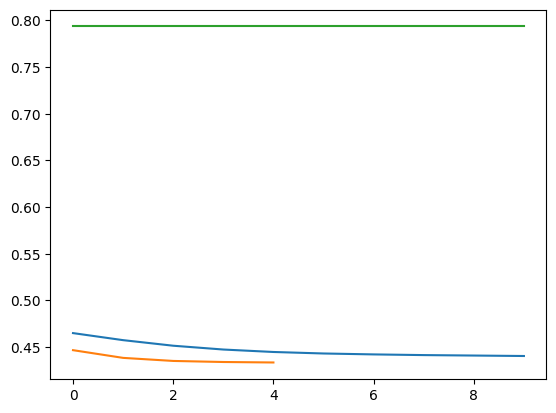

In [152]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.show()

In [153]:
pd.DataFrame(history.history['loss'])

,0
0,0.465086
1,0.457534
2,0.451570
3,0.447493
4,0.444865
5,0.443256
6,0.442267
7,0.441534
8,0.441056
9,0.440558
